In [1]:
from google.colab import files
uploaded = files.upload()


Saving menu.csv to menu.csv


In [2]:
import pandas as pd

# Load the CSV file
data = pd.read_csv("menu.csv")

# Inspect the dataset
print(data.head())
print(data.info())
print(data.describe())


    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
0            

In [3]:
# Check for missing values
print(data.isnull().sum())

# Fill missing numeric values with median
numeric_cols = ['Calories', 'Total Fat', 'Saturated Fat', 'Trans Fat', 'Cholesterol',
                'Sodium', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein']
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Standardize column names (optional)
data.columns = [col.strip().replace(" ", "_") for col in data.columns]



Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64


In [6]:
# Basic statistics
numeric_cols = ['Calories', 'Total_Fat', 'Saturated_Fat', 'Trans_Fat', 'Cholesterol',
                'Sodium', 'Carbohydrates', 'Dietary_Fiber', 'Sugars', 'Protein']
print(data[numeric_cols].describe())

# Mode for categorical columns
print(data['Category'].mode())

          Calories   Total_Fat  Saturated_Fat   Trans_Fat  Cholesterol  \
count   260.000000  260.000000     260.000000  260.000000   260.000000   
mean    368.269231   14.165385       6.007692    0.203846    54.942308   
std     240.269886   14.205998       5.321873    0.429133    87.269257   
min       0.000000    0.000000       0.000000    0.000000     0.000000   
25%     210.000000    2.375000       1.000000    0.000000     5.000000   
50%     340.000000   11.000000       5.000000    0.000000    35.000000   
75%     500.000000   22.250000      10.000000    0.000000    65.000000   
max    1880.000000  118.000000      20.000000    2.500000   575.000000   

            Sodium  Carbohydrates  Dietary_Fiber      Sugars     Protein  
count   260.000000     260.000000     260.000000  260.000000  260.000000  
mean    495.750000      47.346154       1.630769   29.423077   13.338462  
std     577.026323      28.252232       1.567717   28.679797   11.426146  
min       0.000000       0.000000

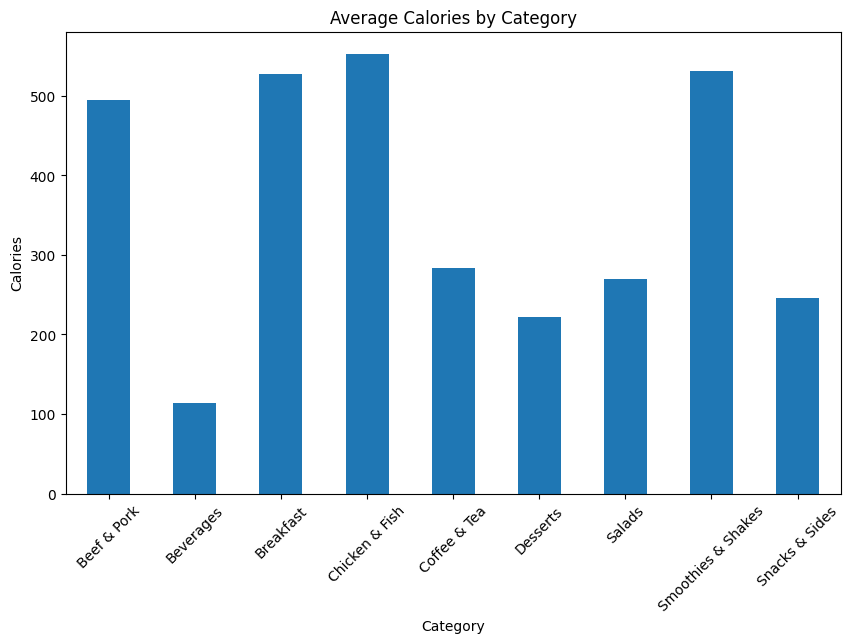

                                        Item  Protein
82              Chicken McNuggets (40 piece)       87
47        Double Quarter Pounder with Cheese       48
81              Chicken McNuggets (20 piece)       44
60     Premium Grilled Chicken Club Sandwich       40
64  Bacon Clubhouse Grilled Chicken Sandwich       40


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Average calories by category
avg_calories = data.groupby('Category')['Calories'].mean()
avg_calories.plot(kind='bar', figsize=(10,6))
plt.title("Average Calories by Category")
plt.ylabel("Calories")
plt.xticks(rotation=45)
plt.show()

# Top 5 items by protein
top_protein = data[['Item', 'Protein']].sort_values(by='Protein', ascending=False).head(5)
print(top_protein)


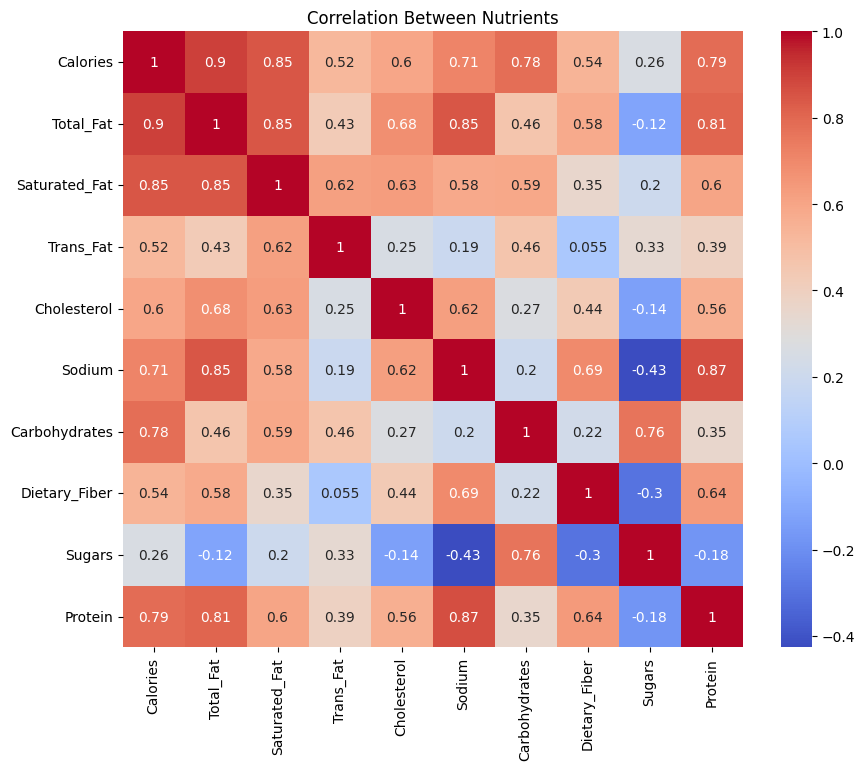

In [8]:
# Correlation matrix
corr = data[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Nutrients")
plt.show()


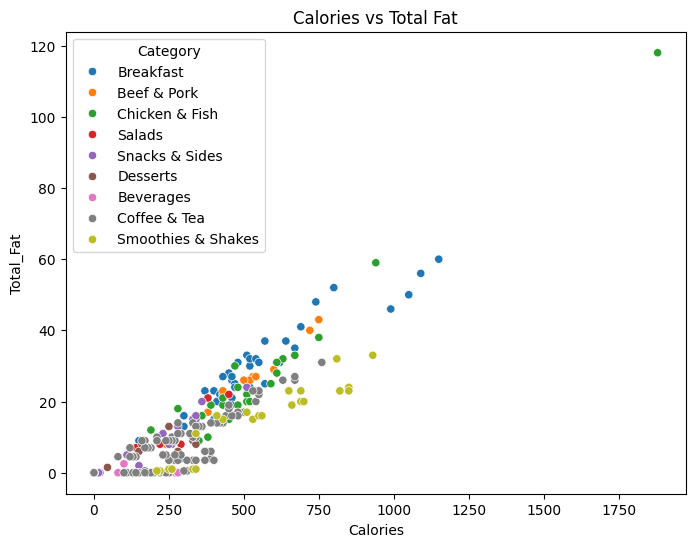

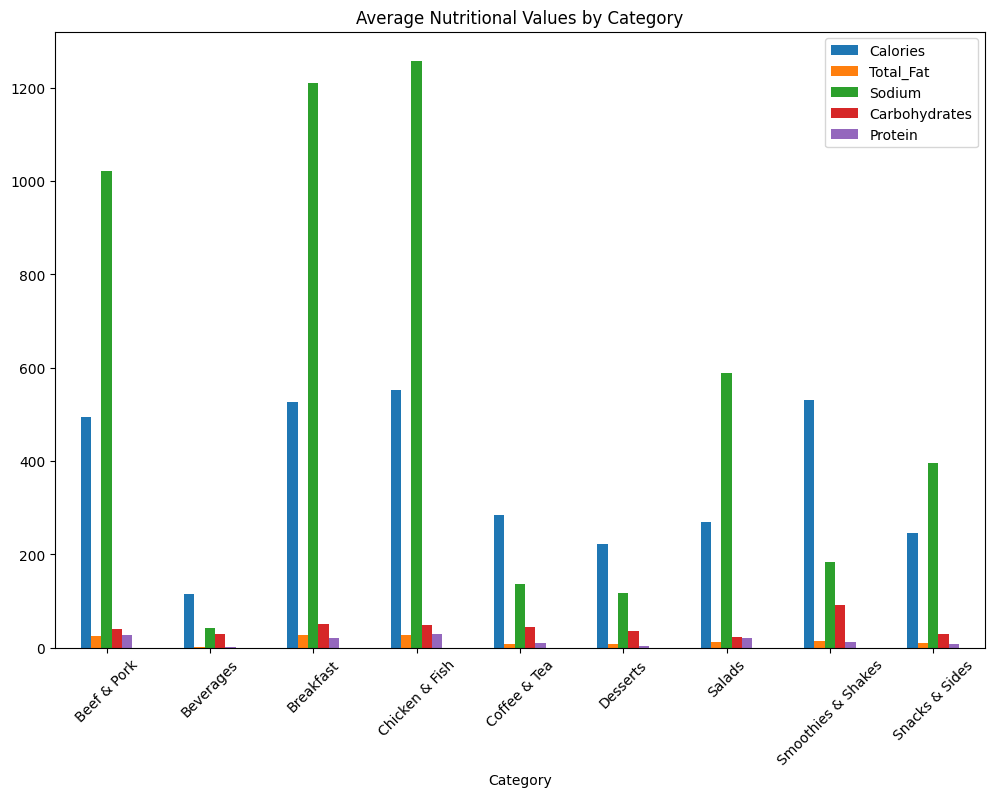

In [9]:
# Calories vs Total Fat scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Calories', y='Total_Fat', hue='Category', data=data)
plt.title("Calories vs Total Fat")
plt.show()

# Nutritional comparison by category
category_nutrition = data.groupby('Category')[['Calories', 'Total_Fat', 'Sodium', 'Carbohydrates', 'Protein']].mean()
category_nutrition.plot(kind='bar', figsize=(12,8))
plt.title("Average Nutritional Values by Category")
plt.xticks(rotation=45)
plt.show()
